In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('/content/star_classification.csv')
df_data = df[["alpha", "delta", "u", "g", "r", "i", "z", "redshift"]]


#convert class to numbers
df_target = df[["class"]]
df_target["class"] = df_target["class"].replace({'GALAXY': 1, 'QSO': 2, 'STAR': 3})

#divide data
split_index1 = int(0.6* len(df))
split_index2 = int(0.8* len(df))

train_inputs = df_data[:split_index1]  # First 60% for training
val_inputs = df_data[split_index1:split_index2] #next 20% validation
test_inputs = df_data[split_index2:]  #last 20% for testing

train_targets = df_target[:split_index1]
val_targets = df_target[split_index1:split_index2]
test_targets = df_target[split_index2:]

#convert to numpy array
train_input_np = train_inputs.to_numpy()
val_input_np = val_inputs.to_numpy()
test_input_np = test_inputs.to_numpy()

train_target_np = train_targets.to_numpy()
val_target_np = val_targets.to_numpy()
test_target_np = test_targets.to_numpy()

#convert to numpy stack
train_input_stack = np.vstack(train_input_np)
val_input_stack = np.vstack(val_input_np)
test_input_stack = np.vstack(test_input_np)

train_target_stack = np.vstack(train_target_np)
val_target_stack = np.vstack(val_target_np)
test_target_stack = np.vstack(test_target_np)


<ipython-input-2-4e29ccedc3ef>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_target["class"] = df_target["class"].replace({'GALAXY': 1, 'QSO': 2, 'STAR': 3})
<ipython-input-2-4e29ccedc3ef>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target["class"] = df_target["class"].replace({'GALAXY': 1, 'QSO': 2, 'STAR': 3})


In [3]:
# df["z"].unique()

train_inputs = train_input_stack.astype(np.float32)
train_targets = train_target_stack.astype(np.float32)

val_inputs = val_input_stack.astype(np.float32)
val_targets = val_target_stack.astype(np.float32)

test_inputs = test_input_stack.astype(np.float32)
test_targets = test_target_stack.astype(np.float32)



In [4]:
df_data

,alpha,delta,u,g,r,i,z,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123
...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,0.000000
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,0.404895
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,0.143366
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,0.455040


In [5]:
(train_inputs)

array([[135.6891   ,  32.494633 ,  23.87882  , ...,  19.16573  ,
         18.79371  ,   0.6347936],
       [144.8261   ,  31.274185 ,  24.77759  , ...,  21.16812  ,
         21.61427  ,   0.779136 ],
       [142.1888   ,  35.582443 ,  25.26307  , ...,  19.34857  ,
         18.94827  ,   0.6441945],
       ...,
       [174.91995  ,  52.271618 ,  22.28294  , ...,  19.2916   ,
         18.8      ,   0.50591  ],
       [184.6338   ,  52.710712 ,  26.06024  , ...,  19.6161   ,
         19.07299  ,   0.5994404],
       [150.09737  ,   3.7487898,  24.12138  , ...,  19.59054  ,
         19.17026  ,   0.5362175]], dtype=float32)

In [6]:
model = keras.Sequential([
     layers.Dense(16, activation="relu"),
     layers.Dense(16, activation = 'relu'),
     layers.Dense(8, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


history = model.fit(train_inputs, train_targets,
                    epochs=7,
                    batch_size=16,
                    validation_data = (val_inputs, val_targets))
history_dict = history.history
history_dict.keys()

Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.5939 - loss: 1.0957 - val_accuracy: 0.8138 - val_loss: 0.5145
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7976 - loss: 0.4649 - val_accuracy: 0.8619 - val_loss: 0.4064
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8556 - loss: 0.3531 - val_accuracy: 0.7984 - val_loss: 0.5484
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8819 - loss: 0.3000 - val_accuracy: 0.9445 - val_loss: 0.2841
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8992 - loss: 0.2702 - val_accuracy: 0.9372 - val_loss: 0.2376
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9091 - loss: 0.2524 - val_accuracy: 0.9319 - val_loss: 0.2089
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9152 - loss: 0.2415 - val_accuracy: 0.8875 - val_loss: 0.2413


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

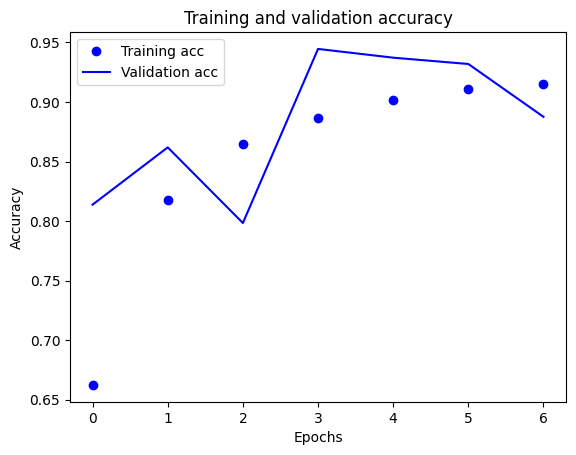

In [7]:
history_dict = history.history
history_dict.keys()

history_dict = history.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(acc, "bo", label="Training acc")
plt.plot( val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# making a function to rerun the model

## ETF

Loading and processing the data.

In [8]:
df = pd.read_csv('/content/star_classification.csv')
df_data = df[["alpha", "delta", "u", "g", "r", "i", "z", "redshift"]]


#convert class to numbers
df_target = df[["class"]]
df_target["class"] = df_target["class"].replace({'GALAXY': 1, 'QSO': 2, 'STAR': 3})

#divide data
split_index1 = int(0.6* len(df))
split_index2 = int(0.8* len(df))

train_inputs = df_data[:split_index1]  # First 60% for training
val_inputs = df_data[split_index1:split_index2] #next 20% validation
test_inputs = df_data[split_index2:]  #last 20% for testing

train_targets = df_target[:split_index1]
val_targets = df_target[split_index1:split_index2]
test_targets = df_target[split_index2:]

#convert to numpy array
train_input_np = train_inputs.to_numpy()
val_input_np = val_inputs.to_numpy()
test_input_np = test_inputs.to_numpy()

train_target_np = train_targets.to_numpy()
val_target_np = val_targets.to_numpy()
test_target_np = test_targets.to_numpy()

#convert to numpy stack
train_input_stack = np.vstack(train_input_np)
val_input_stack = np.vstack(val_input_np)
test_input_stack = np.vstack(test_input_np)

train_target_stack = np.vstack(train_target_np)
val_target_stack = np.vstack(val_target_np)
test_target_stack = np.vstack(test_target_np)

# convert to floats
train_inputs = train_input_stack.astype(np.float32)
train_targets = train_target_stack.astype(np.float32)

val_inputs = val_input_stack.astype(np.float32)
val_targets = val_target_stack.astype(np.float32)

test_inputs = test_input_stack.astype(np.float32)
test_targets = test_target_stack.astype(np.float32)

<ipython-input-8-0b0679614b37>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_target["class"] = df_target["class"].replace({'GALAXY': 1, 'QSO': 2, 'STAR': 3})
<ipython-input-8-0b0679614b37>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target["class"] = df_target["class"].replace({'GALAXY': 1, 'QSO': 2, 'STAR': 3})


## defining the function

!!!!! note for lorraine--- go back later and implement kwargs instead

In [9]:
def stellar_model(intermediate_layers, layer_units, optimize, loss_function, my_epochs, batchsize):

    #define intermediate layers and layer units for model
    layers_for_model = []
    for i in range(intermediate_layers):
      layers_for_model.append(layers.Dense(layer_units, activation="relu"))

    # layers_for_model = []
    # for i in range(intermediate_layers):
    #   layers_for_model.append(layers.Dense(layer_units, activation="relu"))

    # model = keras.Sequential([
    #  layers.Dense(16, activation="relu"),
    #  layers.Dense(16, activation = 'relu'),
    #  layers.Dense(8, activation="softmax")
    # ])

    model = keras.Sequential(layers_for_model + [layers.Dense(8, activation="softmax")])

    model.compile(optimizer=optimize,
                  loss=loss_function,
                  metrics=["accuracy"])


    history = model.fit(train_inputs, train_targets,
                        epochs=my_epochs,
                        batch_size=16,
                        validation_data = (val_inputs, val_targets))

    history_dict = history.history
    history_dict.keys()

    history_dict = history.history
    acc = history_dict["accuracy"]
    val_acc = history_dict["val_accuracy"]

    plt.plot(acc, "bo", label="Training acc")
    plt.plot( val_acc, "b", label="Validation acc")

    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()



## Building a Function to Generate the Model

### testing the function

Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5949 - loss: 3.8767 - val_accuracy: 0.7772 - val_loss: 0.6420
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8328 - loss: 0.3983 - val_accuracy: 0.9255 - val_loss: 0.4862
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8757 - loss: 0.3139 - val_accuracy: 0.8559 - val_loss: 0.5522
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8903 - loss: 0.2849 - val_accuracy: 0.8820 - val_loss: 0.4644
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9064 - loss: 0.2575 - val_accuracy: 0.9362 - val_loss: 0.3851
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9137 - loss: 0.2419 - val_accuracy: 0.9481 - val_loss: 0.4217
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9203 - loss: 0.2318 - val_accuracy: 0.9435 - val_loss: 0.4299


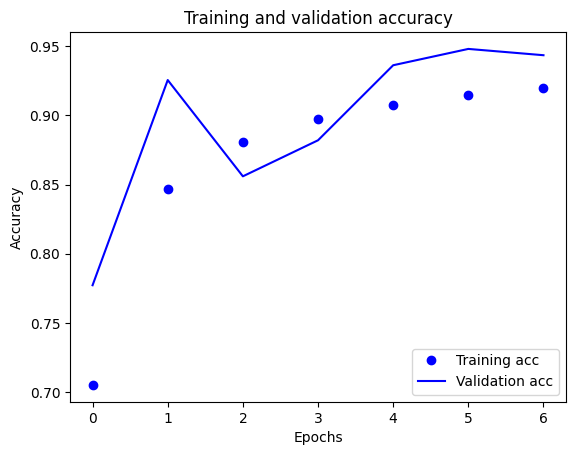

In [10]:
default = stellar_model(2, 16, "rmsprop", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5854 - loss: 1.4115 - val_accuracy: 0.6001 - val_loss: 1.0954
Epoch 2/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5965 - loss: 0.9528 - val_accuracy: 0.5997 - val_loss: 1.1109
Epoch 3/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5932 - loss: 0.9480 - val_accuracy: 0.6004 - val_loss: 1.0974
Epoch 4/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5936 - loss: 0.9374 - val_accuracy: 0.5999 - val_loss: 1.0968
Epoch 5/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5916 - loss: 0.9248 - val_accuracy: 0.6006 - val_loss: 1.0711
Epoch 6/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6037 - loss: 0.9000 - val_accuracy: 0.7031 - val_loss: 1.0456
Epoch 7/7
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6243 - loss: 0.8686 - val_accuracy: 0.7109 - val_loss: 0.9258


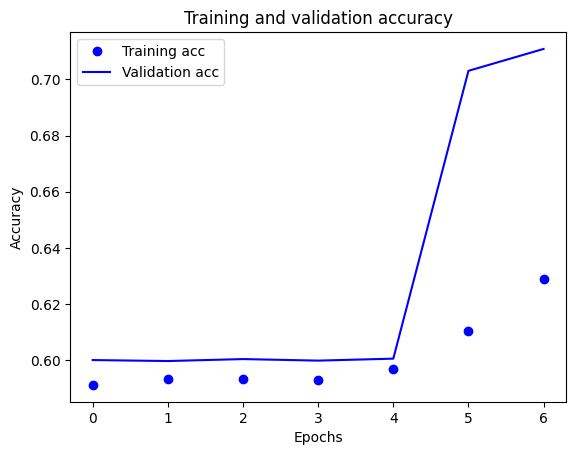

In [11]:
stellar_model(2, 16, "SGD", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
# optimizer changed to SGD https://keras.io/api/optimizers/sgd/

### **NOTES**

losses:
- [categorical_crossentropy](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) does not work (bc of inherent loss or error in code?)